# Exercises

There are three exercises in this notebook:

1. Use the cross-validation method to test the linear regression with different $\alpha$ values, at least three.
2. Implement a SGD method that will train the Lasso regression for 10 epochs.
3. Extend the Fisher's classifier to work with two features. Use the class as the $y$.

## 1. Cross-validation linear regression

You need to change the variable ``alpha`` to be a list of alphas. Next do a loop and finally compare the results.

Ridge regression minimizes sum of squares of $\text{residuals} + \text{lambda} * \text{slope}^2$, so the bigger the lambda, the smaller the slope and bigger the sum of squares of residuals.

### Explanation of equations from lecture below

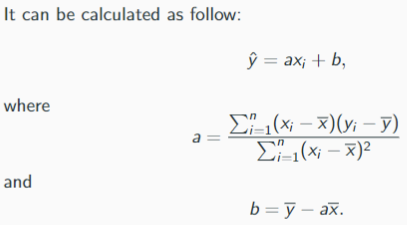

#### OLS Cost Function
$$\text{sum of squared residuals} = \sum_{i=1}^{n} (y_i - \hat{y_i})^2$$
$$\text{Ordinary Least Squares (OLS) cost function} = COLS(a, b) = \sum_{i=1}^{n} (y_i - (a x_i + b))^2$$
It is a quadratic function, so it has at most one extremum and it's minimum since all of its values are non-nagetive. Thus, the solution obtained by setting derivatives to zero is the unique global minimum.
#### Deriving the OLS formula for a and b from the cost function
Differentiating $COLS(a, b)$ with respect to $b$ and setting this equal to $0$:
$$\frac{\partial COLS(a, b)}{\partial b} = -2 \sum_{i=1}^{n} (y_i - (a x_i + b)) = 0$$
Simplifying:
$$\sum_{i=1}^{n} y_i = a \sum_{i=1}^{n} x_i + n b$$
Solving for $b$:
$$b = \frac{1}{n} \sum_{i=1}^{n} y_i - a \frac{1}{n} \sum_{i=1}^{n} x_i = \bar{y} - a\bar{x}$$
Reminder:
$$\text{Ordinary Least Squares (OLS) cost function} = COLS(a, b) = \sum_{i=1}^{n} (y_i - (a x_i + b))^2$$
Differentiating $COLS(a, b)$ with respect to $a$ and setting this equal to $0$:
$$\frac{\partial COLS(a, b)}{\partial a} = -2 \sum_{i=1}^{n} (x_i (y_i - (a x_i + b))) = 0$$
Simplifying:
$$\sum_{i=1}^{n} (x_i (y_i - (a x_i + b))) = 0$$
Substituting $b = \bar{y} - a\bar{x}$ into the equation:
$$\sum_{i=1}^{n} (x_i (y_i - (a x_i + \bar{y} - a\bar{x}))) = 0$$
$$\sum_{i=1}^{n} (x_i (y_i - \bar{y}) - 0) = a \left( \sum_{i=1}^{n} (x_i(x_i - \bar{x})) - 0\right)$$
$$\sum_{i=1}^{n} (x_i (y_i - \bar{y})) - \sum_{i=1}^{n} (y_i - \bar{y}) = a \left( \sum_{i=1}^{n} (x_i(x_i - \bar{x})) - \sum_{i=1}^{n} (x_i - \bar{x}) \right)$$
$$\sum_{i=1}^{n} (x_i (y_i - \bar{y})) - \sum_{i=1}^{n} (\bar{x}(y_i - \bar{y})) = a \left( \sum_{i=1}^{n} (x_i(x_i - \bar{x})) - \sum_{i=1}^{n} (\bar{x}(x_i - \bar{x})) \right)$$
$$\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y}) = a \left( \sum_{i=1}^{n} \left((x_i - \bar{x})^2\right)\right)$$
$$a = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n} (x_i - \bar{x})^2}$$
$$b = \bar{y} - a\bar{x}$$

From curiosity calculating number of A (additions), S (substractions), M (multiplications) and D (divisions) required to compare with matrix form. Starting with reusable parts and without computing twice $x_i - \bar{x}$.

$\bar{x}$ = n-1 A, 1 D

$\bar{y}$ = n-1 A, 1 D

Altogether 4n-4 A, 2n+1 S, 2n+1 M, 3 D, so about 8n operations


Now to calculate $\beta$:
$$\beta = (X^T X)^{-1} X^Ty = \left(\begin{bmatrix} n & \sum_{i=1}^{n} x_i \\ \sum_{i=1}^{n} x_i & \sum_{i=1}^{n} x_i^2 \end{bmatrix}\right)^{-1} \begin{bmatrix} \sum_{i=1}^{n} y_i \\ \sum_{i=1}^{n} x_i y_i \end{bmatrix}$$
$$\beta = \left(\frac{1}{n \sum_{i=1}^{n} x_i^2 - (\sum_{i=1}^{n} x_i)^2} \begin{bmatrix} \sum_{i=1}^{n} x_i^2 & -\sum_{i=1}^{n} x_i \\ -\sum_{i=1}^{n} x_i & n \end{bmatrix}\right) \begin{bmatrix} \sum_{i=1}^{n} y_i \\ \sum_{i=1}^{n} x_i y_i \end{bmatrix}$$

Altogether 4n-2 A, 1 S, 2n+6 M, 3 D (and 1 negation), so about 6n operations, which is better than non-matrix solution

### The equation for calculating the weights (a and b) used in code
$$\begin{bmatrix} b \\ a \end{bmatrix} = \beta = (X^{T}X)^{-1}X^{T}y$$
Derivation below:

$$\text{sum of squared residuals} = \sum_{i=1}^{n} (y_i - \hat{y_i})^2$$
$$\text{Ordinary Least Squares (OLS) cost function} = COLS(a, b) = \sum_{i=1}^{n} (y_i - (a x_i + b))^2$$
Differentiating $COLS(a, b)$ with respect to $b$ and setting this equal to $0$:
$$\frac{\partial COLS(a, b)}{\partial b} = -2 \sum_{i=1}^{n} (y_i - (a x_i + b)) = 0$$
$$nb + (\sum_{i=1}^{n} x_i)a = \sum_{i=1}^{n} y_i$$
Differentiating $COLS(a, b)$ with respect to $a$ and setting this equal to $0$:
$$\frac{\partial COLS(a, b)}{\partial a} = -2 \sum_{i=1}^{n} (x_i (y_i - (a x_i + b))) = 0$$
$$(\sum_{i=1}^{n} x_i)b + (\sum_{i=1}^{n} x_i^2)a = \sum_{i=1}^{n} x_i y_i$$
Gathering both above into matrix form:
$$\begin{bmatrix} n & \sum_{i=1}^{n} x_i \\ \sum_{i=1}^{n} x_i & \sum_{i=1}^{n} x_i^2 \end{bmatrix} \begin{bmatrix} b \\ a \end{bmatrix} = \begin{bmatrix} \sum_{i=1}^{n} y_i \\ \sum_{i=1}^{n} x_i y_i \end{bmatrix}$$
$$X = \begin{bmatrix} 1 & x_1 \\ 1 & x_2 \\ \vdots & \vdots \\ 1 & x_n \end{bmatrix}, \quad y = \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{bmatrix}, \quad \beta = \begin{bmatrix} b \\ a \end{bmatrix}$$
$$X^T X \beta = X^Ty$$
Solving for $\beta$:
$$\beta = (X^T X)^{-1} X^Ty$$


$$\text{Ordinary Least Squares (OLS) cost function} = COLS(a, b) = \sum_{i=1}^{n} (y_i - (a x_i + b))^2$$
Function above is used to evaluate linear regression performance, how well it fits, but $\beta = (X^T X)^{-1} X^Ty$ which was proposed in code to get weights is directly derived as the minimum of the very same cost funtion (COLS), so surely with alpha = 0 the minimum which value is measured, is reached.

### Example
$$X = \begin{bmatrix} 1 & 1 \\ 1 & 2 \\ 1 & 3 \end{bmatrix}, \quad y = \begin{bmatrix} 3 \\ 5 \\ 7 \end{bmatrix}, \quad \beta = \begin{bmatrix} b \\ a \end{bmatrix}$$
$$\beta = (X^T X)^{-1} X^Ty$$
$$\beta = \left(\begin{bmatrix} 1 & 1 & 1 \\ 1 & 2 & 3 \end{bmatrix} \begin{bmatrix} 1 & 1 \\ 1 & 2 \\ 1 & 3 \end{bmatrix}\right)^{-1} \begin{bmatrix} 1 & 1 & 1 \\ 1 & 2 & 3 \end{bmatrix} \begin{bmatrix} 3 \\ 5 \\ 7 \end{bmatrix}$$
Single-equation reminder of matrix elements meanings:
$$\begin{bmatrix} b \\ a \end{bmatrix} = \left(\begin{bmatrix} n & \sum_{i=1}^{n} x_i \\ \sum_{i=1}^{n} x_i & \sum_{i=1}^{n} x_i^2 \end{bmatrix}\right)^{-1} \begin{bmatrix} \sum_{i=1}^{n} y_i \\ \sum_{i=1}^{n} x_i y_i \end{bmatrix}$$
$$\beta = \left(\begin{bmatrix} 3 & 6 \\ 6 & 14 \end{bmatrix}\right)^{-1} \begin{bmatrix} 15 \\ 34 \end{bmatrix}$$
$$\beta = \left(\frac{1}{3*14 - 6*6} \begin{bmatrix} 14 & -6 \\ -6 & 3 \end{bmatrix}\right) \begin{bmatrix} 15 \\ 34 \end{bmatrix}$$
$$\beta = \left(\begin{bmatrix} \frac{7}{3} & -1 \\ -1 & \frac{1}{2} \end{bmatrix}\right) \begin{bmatrix} 15 \\ 34 \end{bmatrix} = \begin{bmatrix} 1 \\ 2 \end{bmatrix} = \begin{bmatrix} b \\ a \end{bmatrix}$$

In [4]:
import numpy as np
# x = np.array([188, 181, 197, 168, 167, 187, 178, 194, 140, 176, 168, 192, 173, 142, 176]).reshape(-1, 1).reshape(15,1)
# y = np.array([141, 106, 149, 59, 79, 136, 65, 136, 52, 87, 115, 140, 82, 69, 121]).reshape(-1, 1).reshape(15,1)
# x = np.asmatrix(np.c_[np.ones((15,1)),x])
x = np.array([1, 2, 3]).reshape(-1, 1)
y = np.array([3, 5, 7]).reshape(-1, 1)
x = np.asmatrix(np.c_[np.ones((3,1)),x])
print(x)
I = np.identity(2)
alpha = 0.0
print(x.T*x)
print(x.T*x + alpha * I)
print(np.linalg.inv(x.T*x + alpha * I))
w = np.linalg.inv(x.T*x + alpha * I)*x.T*y
print(w)
w=w.ravel()
print(w)

[[1. 1.]
 [1. 2.]
 [1. 3.]]
[[ 3.  6.]
 [ 6. 14.]]
[[ 3.  6.]
 [ 6. 14.]]
[[ 2.33333333 -1.        ]
 [-1.          0.5       ]]
[[1.]
 [2.]]
[[1. 2.]]


In [17]:
import numpy as np

first_x = np.array([188, 181, 197, 168, 167, 187, 178, 194, 140, 176, 168, 192, 173, 142, 176])
x = first_x.reshape(-1, 1).reshape(15,1)
first_y = np.array([141, 106, 149, 59, 79, 136, 65, 136, 52, 87, 115, 140, 82, 69, 121])
y = first_y.reshape(-1, 1).reshape(15,1)

x = np.asmatrix(np.c_[np.ones((15,1)),x])

I = np.identity(2)
alphas = [0, 0.1, 0.2, 0.4]

for alpha in alphas:
  w = np.linalg.inv(x.T*x + alpha * I)*x.T*y
  a = w[0, 0]
  b = w[1, 0]
  error = np.mean((first_y - (a + b * first_x)) ** 2)
  print(f"Alpha = {alpha}: MSE = {error:.2f}")

Alpha = 0: MSE = 372.33
Alpha = 0.1: MSE = 426.05
Alpha = 0.2: MSE = 476.27
Alpha = 0.4: MSE = 532.94


## 2. Implement based on the Ridge regression example, the Lasso regression.

Please implement the SGD method and compare the results with the sklearn Lasso regression results. 

Final weights: a = 0.00011334812733589258, b = 0.01853760576971702
Alpha = 178000.0: MSE = 10894.79


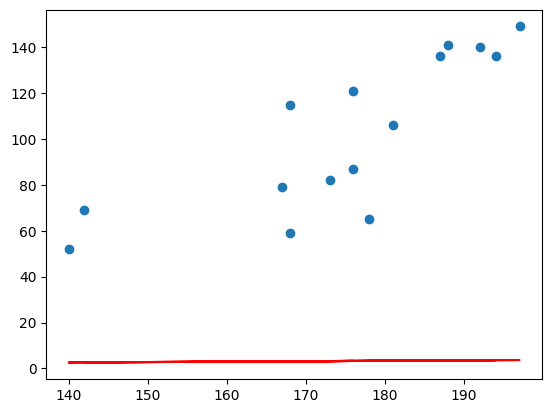

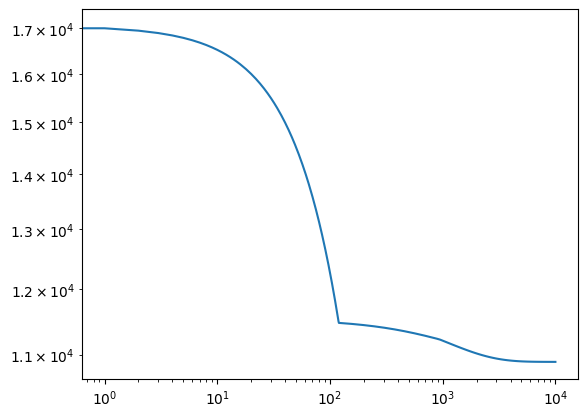

In [ ]:
import matplotlib.pyplot as plt

def sgd(x, y, alpha, lr, epochs):
  np.random.seed(42)
  w = np.random.randn(2, 1)
  samples = np.array([[feature, label] for feature, label in zip(x, y)])
  groups = [samples[idx] for idx in np.array_split(np.random.permutation(len(samples)), 3)]
  history = []
  for _ in range(epochs):
    for group in groups:
      X = np.asmatrix(np.c_[np.ones((len(group[:, 0]), 1)), group[:, 0]])
      group_y = group[:, 1].reshape(-1, 1)
      grads = 2 * X.T @ (X @ w - group_y) + alpha * np.sign(w)
      w = w - lr * grads
    a = w[0, 0]
    b = w[1, 0]
    history.append(np.mean((y - (a + b * x)) ** 2))
  return w, history

x = np.array([188, 181, 197, 168, 167, 187, 178, 194, 140, 176, 168, 192, 173, 142, 176])
y = np.array([141, 106, 149, 59, 79, 136, 65, 136, 52, 87, 115, 140, 82, 69, 121])

alpha = 0.1
w, history = sgd(x, y, alpha, 1e-9, 10000)
a = w[0, 0]
b = w[1, 0]
print(f"Final weights: a = {a}, b = {b}")
error = np.mean((y - (a + b * x)) ** 2)
print(f"Alpha = {alpha}: MSE = {error:.2f}")

plt.plot(x, y, 'o')
plt.plot(x, a + b * x, 'r-')
plt.show()
plt.plot(history)
plt.loglog()
plt.show()

## 3. Extend the Fisher's classifier

Please extend the targets of the ``iris_data`` variable and use it as the $y$.

In [4]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

iris_data = load_iris()
df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)

x = df['sepal width (cm)'].values
y = iris_data.target

classes = np.unique(y)
centroids = {cls: x[y == cls].mean() for cls in classes}

y_pred = np.array([
    min(classes, key=lambda cls: abs(xi - centroids[cls]))
    for xi in x
])
accuracy = np.mean(y_pred == y)
print(f"Training accuracy: {accuracy * 100:.2f}%")

Training accuracy: 55.33%
